# Music Churn:  Predictive Modeling Notebook
Python Notebook 2 of 3

## W207, Final Project
Spring, 2018

Team:  Cameron Kennedy, Gaurav Khanna, Aaron Olson

## Overview of Notebooks
For this project, the team created 3 separate Jupyter Notebooks to document its work.  See notebook #1, (Data Preparation / Feature Extraction) for a brief description of each notebook.

## Table of Contents (this notebook only)

9. Setup and Loading Libraries
10. Predictive Modeling!


# 9. Setup and Loading Libraries

In [1]:
#Import Required Libraries
#Data manipulation and visualization
import pandas as pd
import numpy as np
import itertools
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Models et al
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.grid_search import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
import xgboost
#from sklearn.preprocessing import CategoricalEncoder  #Not yet released!

#Metrics
from sklearn.metrics import (roc_curve, precision_recall_curve, auc, make_scorer, recall_score, accuracy_score, 
    precision_score, confusion_matrix, classification_report)

C:\Users\camke\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\camke\Anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [2]:
# Load the data
df_fa = pd.read_pickle('df_fa.pkl')  #Pickle format preserves file as python object

#Set initial parameter(s)
pd.set_option('display.max_rows', 200)
pd.options.display.max_columns = 2000

#Ensure it's what we expect:
print(df_fa.shape)
df_fa.head()

(88544, 151)


,city,bd,registered_via,registration_init_time,is_churn,date_featuresdatelistening_tenure,within_days_1num_unqsum,within_days_1num_unqmean,within_days_1num_unqcount,within_days_1total_secssum,within_days_1total_secsmean,within_days_1num_25sum,within_days_1num_25mean,within_days_1num_50sum,within_days_1num_50mean,within_days_1num_75sum,within_days_1num_75mean,within_days_1num_985sum,within_days_1num_985mean,within_days_1num_100sum,within_days_1num_100mean,within_days_7num_unqsum,within_days_7num_unqmean,within_days_7num_unqcount,within_days_7total_secssum,within_days_7total_secsmean,within_days_7num_25sum,within_days_7num_25mean,within_days_7num_50sum,within_days_7num_50mean,within_days_7num_75sum,within_days_7num_75mean,within_days_7num_985sum,within_days_7num_985mean,within_days_7num_100sum,within_days_7num_100mean,within_days_14num_unqsum,within_days_14num_unqmean,within_days_14num_unqcount,within_days_14total_secssum,within_days_14total_secsmean,within_days_14num_25sum,within_days_14num_25mean,within_days_14num_50sum,within_days_14num_50mean,within_days_14num_75sum,within_days_14num_75mean,within_days_14num_985sum,within_days_14num_985mean,within_days_14num_100sum,within_days_14num_100mean,within_days_31num_unqsum,within_days_31num_unqmean,within_days_31num_unqcount,within_days_31total_secssum,within_days_31total_secsmean,within_days_31num_25sum,within_days_31num_25mean,within_days_31num_50sum,within_days_31num_50mean,within_days_31num_75sum,within_days_31num_75mean,within_days_31num_985sum,within_days_31num_985mean,within_days_31num_100sum,within_days_31num_100mean,within_days_90num_unqsum,within_days_90num_unqmean,within_days_90num_unqcount,within_days_90total_secssum,within_days_90total_secsmean,within_days_90num_25sum,within_days_90num_25mean,within_days_90num_50sum,within_days_90num_50mean,within_days_90num_75sum,within_days_90num_75mean,within_days_90num_985sum,within_days_90num_985mean,within_days_90num_100sum,within_days_90num_100mean,within_days_180num_unqsum,within_days_180num_unqmean,within_days_180num_unqcount,within_days_180total_secssum,within_days_180total_secsmean,within_days_180num_25sum,within_days_180num_25mean,within_days_180num_50sum,within_days_180num_50mean,within_days_180num_75sum,within_days_180num_75mean,within_days_180num_985sum,within_days_180num_985mean,within_days_180num_100sum,within_days_180num_100mean,within_days_365num_unqsum,within_days_365num_unqmean,within_days_365num_unqcount,within_days_365total_secssum,within_days_365total_secsmean,within_days_365num_25sum,within_days_365num_25mean,within_days_365num_50sum,within_days_365num_50mean,within_days_365num_75sum,within_days_365num_75mean,within_days_365num_985sum,within_days_365num_985mean,within_days_365num_100sum,within_days_365num_100mean,within_days_9999num_unqsum,within_days_9999num_unqmean,within_days_9999num_unqcount,within_days_9999total_secssum,within_days_9999total_secsmean,within_days_9999num_25sum,within_days_9999num_25mean,within_days_9999num_50sum,within_days_9999num_50mean,within_days_9999num_75sum,within_days_9999num_75mean,within_days_9999num_985sum,within_days_9999num_985mean,within_days_9999num_100sum,within_days_9999num_100mean,total_plan_days,total_amount_paid,amount_paid_per_day,diff_renewal_duration,diff_plan_amount_paid_per_day,latest_payment_method_id,latest_plan_days,latest_plan_list_price,latest_amount_paid,latest_auto_renew,latest_transaction_date,latest_expire_date,latest_is_cancel,latest_amount_paid_per_day,date_featuresdatemax_date_year,date_featuresdatemax_date_month,date_featuresdatemax_date_day,date_featuresdatemax_date_absday,date_featuresdatemin_date_year,date_featuresdatemin_date_month,date_featuresdatemin_date_day,date_featuresdatemin_date_absday,female,male,registration_time
msno,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
mKfgXQAmVeSKzN4rXW37qz0HbGCuYBspTBM3ONXZudg=,1,0,13,20170120,0,35,1,1,1,10.

# 10. Predictive Modeling!

In [21]:
df_fa.describe(include='all')

,city,bd,registered_via,registration_init_time,is_churn,date_featuresdatelistening_tenure,within_days_1num_unqsum,within_days_1num_unqmean,within_days_1num_unqcount,within_days_1total_secssum,within_days_1total_secsmean,within_days_1num_25sum,within_days_1num_25mean,within_days_1num_50sum,within_days_1num_50mean,within_days_1num_75sum,within_days_1num_75mean,within_days_1num_985sum,within_days_1num_985mean,within_days_1num_100sum,within_days_1num_100mean,within_days_7num_unqsum,within_days_7num_unqmean,within_days_7num_unqcount,within_days_7total_secssum,within_days_7total_secsmean,within_days_7num_25sum,within_days_7num_25mean,within_days_7num_50sum,within_days_7num_50mean,within_days_7num_75sum,within_days_7num_75mean,within_days_7num_985sum,within_days_7num_985mean,within_days_7num_100sum,within_days_7num_100mean,within_days_14num_unqsum,within_days_14num_unqmean,within_days_14num_unqcount,within_days_14total_secssum,within_days_14total_secsmean,within_days_14num_25sum,within_days_14num_25mean,within_days_14num_50sum,within_days_14num_50mean,within_days_14num_75sum,within_days_14num_75mean,within_days_14num_985sum,within_days_14num_985mean,within_days_14num_100sum,within_days_14num_100mean,within_days_31num_unqsum,within_days_31num_unqmean,within_days_31num_unqcount,within_days_31total_secssum,within_days_31total_secsmean,within_days_31num_25sum,within_days_31num_25mean,within_days_31num_50sum,within_days_31num_50mean,within_days_31num_75sum,within_days_31num_75mean,within_days_31num_985sum,within_days_31num_985mean,within_days_31num_100sum,within_days_31num_100mean,within_days_90num_unqsum,within_days_90num_unqmean,within_days_90num_unqcount,within_days_90total_secssum,within_days_90total_secsmean,within_days_90num_25sum,within_days_90num_25mean,within_days_90num_50sum,within_days_90num_50mean,within_days_90num_75sum,within_days_90num_75mean,within_days_90num_985sum,within_days_90num_985mean,within_days_90num_100sum,within_days_90num_100mean,within_days_180num_unqsum,within_days_180num_unqmean,within_days_180num_unqcount,within_days_180total_secssum,within_days_180total_secsmean,within_days_180num_25sum,within_days_180num_25mean,within_days_180num_50sum,within_days_180num_50mean,within_days_180num_75sum,within_days_180num_75mean,within_days_180num_985sum,within_days_180num_985mean,within_days_180num_100sum,within_days_180num_100mean,within_days_365num_unqsum,within_days_365num_unqmean,within_days_365num_unqcount,within_days_365total_secssum,within_days_365total_secsmean,within_days_365num_25sum,within_days_365num_25mean,within_days_365num_50sum,within_days_365num_50mean,within_days_365num_75sum,within_days_365num_75mean,within_days_365num_985sum,within_days_365num_985mean,within_days_365num_100sum,within_days_365num_100mean,within_days_9999num_unqsum,within_days_9999num_unqmean,within_days_9999num_unqcount,within_days_9999total_secssum,within_days_9999total_secsmean,within_days_9999num_25sum,within_days_9999num_25mean,within_days_9999num_50sum,within_days_9999num_50mean,within_days_9999num_75sum,within_days_9999num_75mean,within_days_9999num_985sum,within_days_9999num_985mean,within_days_9999num_100sum,within_days_9999num_100mean,total_plan_days,total_amount_paid,amount_paid_per_day,diff_renewal_duration,diff_plan_amount_paid_per_day,latest_payment_method_id,latest_plan_days,latest_plan_list_price,latest_amount_paid,latest_auto_renew,latest_transaction_date,latest_expire_date,latest_is_cancel,latest_amount_paid_per_day,date_featuresdatemax_date_year,date_featuresdatemax_date_month,date_featuresdatemax_date_day,date_featuresdatemax_date_absday,date_featuresdatemin_date_year,date_featuresdatemin_date_month,date_featuresdatemin_date_day,date_featuresdatemin_date_absday,female,male,registration_time
count,88544.000000,88544.000000,88544.000000,8.854400e+04,88544.000000,88544.000000,88544.000000,88544.000000,88544.0,88544.000000,88544.000000,88544.000000,88544.000000,88544.000000,88544.000000,88544.000000,88544.000000,88544.000

In [22]:
#Split data into a) train, dev, & test, b) data & labels

np.random.seed(5)  #Set so that % churn is somewhat consistent

#Train, Dev, Test splits: 60/25/15
train, devtest = train_test_split(df_fa, test_size=0.4)
dev, test = train_test_split(devtest, test_size=15/40)

#Calculate churn percentages
churn_rate_all = df_fa['is_churn'].sum() / df_fa['is_churn'].count()
churn_rate_train = train['is_churn'].sum() / train['is_churn'].count()
churn_rate_dev = dev['is_churn'].sum() / dev['is_churn'].count()
churn_rate_test = test['is_churn'].sum() / test['is_churn'].count()

#Print churn percentages
print('Check churn percentages:')
print('  All data, % churn: {:.1%}'.format(churn_rate_all))
print('Train data, % churn: {:.1%}'.format(churn_rate_train))
print('  Dev data, % churn: {:.1%}'.format(churn_rate_dev))
print(' Test data, % churn: {:.1%}'.format(churn_rate_test))

#Reduce dev set to 6% churn
#Select x rows is_churn == 1; append to all rows where is_churn == 0
churn_rate_actual = 0.06  #Churn rate of the full data set
dev_churn_split_factor = (churn_rate_dev * churn_rate_actual) / (1 - churn_rate_actual)
dummy, dev_sub = train_test_split(dev[dev.is_churn==1], test_size=dev_churn_split_factor)
dev = pd.concat([dev[dev.is_churn==0], dev_sub], ignore_index=True)

#Split data / labels
train_labels = train['is_churn']
train_data = train.drop('is_churn', axis=1)
dev_labels = dev['is_churn']
dev_data = dev.drop('is_churn', axis=1)
test_labels = test['is_churn']
test_data = test.drop('is_churn', axis=1)

print('\nCheck data sizes:')
print('Train data / test: ', train_data.shape, train_labels.shape)
print('  Dev data / test: ', dev_data.shape, dev_labels.shape)
print(' Test data / test: ', test_data.shape, test_labels.shape)

#Baseline (if we guess all 0's, this is what we get)
print('\nBaseline Accuracy: {:.2%}'.format(1-(dev['is_churn'].sum() / dev['is_churn'].count())))

Check churn percentages:
  All data, % churn: 50.6%
Train data, % churn: 50.7%
  Dev data, % churn: 50.4%
 Test data, % churn: 50.2%

Check data sizes:
Train data / test:  (53126, 150) (53126,)
  Dev data / test:  (11345, 150) (11345,)
 Test data / test:  (13282, 150) (13282,)

Baseline Accuracy: 96.84%


In [23]:
#let's look at our data
dev_data.describe()
dev_data.isnull().sum(axis=0)
dev_data.info()
# for col in train_data.columns:
#     pass

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11345 entries, 0 to 11344
Columns: 150 entries, city to registration_time
dtypes: float64(61), int64(87), uint8(2)
memory usage: 12.8 MB


In [24]:
dev_data.describe(include='all')


,city,bd,registered_via,registration_init_time,date_featuresdatelistening_tenure,within_days_1num_unqsum,within_days_1num_unqmean,within_days_1num_unqcount,within_days_1total_secssum,within_days_1total_secsmean,within_days_1num_25sum,within_days_1num_25mean,within_days_1num_50sum,within_days_1num_50mean,within_days_1num_75sum,within_days_1num_75mean,within_days_1num_985sum,within_days_1num_985mean,within_days_1num_100sum,within_days_1num_100mean,within_days_7num_unqsum,within_days_7num_unqmean,within_days_7num_unqcount,within_days_7total_secssum,within_days_7total_secsmean,within_days_7num_25sum,within_days_7num_25mean,within_days_7num_50sum,within_days_7num_50mean,within_days_7num_75sum,within_days_7num_75mean,within_days_7num_985sum,within_days_7num_985mean,within_days_7num_100sum,within_days_7num_100mean,within_days_14num_unqsum,within_days_14num_unqmean,within_days_14num_unqcount,within_days_14total_secssum,within_days_14total_secsmean,within_days_14num_25sum,within_days_14num_25mean,within_days_14num_50sum,within_days_14num_50mean,within_days_14num_75sum,within_days_14num_75mean,within_days_14num_985sum,within_days_14num_985mean,within_days_14num_100sum,within_days_14num_100mean,within_days_31num_unqsum,within_days_31num_unqmean,within_days_31num_unqcount,within_days_31total_secssum,within_days_31total_secsmean,within_days_31num_25sum,within_days_31num_25mean,within_days_31num_50sum,within_days_31num_50mean,within_days_31num_75sum,within_days_31num_75mean,within_days_31num_985sum,within_days_31num_985mean,within_days_31num_100sum,within_days_31num_100mean,within_days_90num_unqsum,within_days_90num_unqmean,within_days_90num_unqcount,within_days_90total_secssum,within_days_90total_secsmean,within_days_90num_25sum,within_days_90num_25mean,within_days_90num_50sum,within_days_90num_50mean,within_days_90num_75sum,within_days_90num_75mean,within_days_90num_985sum,within_days_90num_985mean,within_days_90num_100sum,within_days_90num_100mean,within_days_180num_unqsum,within_days_180num_unqmean,within_days_180num_unqcount,within_days_180total_secssum,within_days_180total_secsmean,within_days_180num_25sum,within_days_180num_25mean,within_days_180num_50sum,within_days_180num_50mean,within_days_180num_75sum,within_days_180num_75mean,within_days_180num_985sum,within_days_180num_985mean,within_days_180num_100sum,within_days_180num_100mean,within_days_365num_unqsum,within_days_365num_unqmean,within_days_365num_unqcount,within_days_365total_secssum,within_days_365total_secsmean,within_days_365num_25sum,within_days_365num_25mean,within_days_365num_50sum,within_days_365num_50mean,within_days_365num_75sum,within_days_365num_75mean,within_days_365num_985sum,within_days_365num_985mean,within_days_365num_100sum,within_days_365num_100mean,within_days_9999num_unqsum,within_days_9999num_unqmean,within_days_9999num_unqcount,within_days_9999total_secssum,within_days_9999total_secsmean,within_days_9999num_25sum,within_days_9999num_25mean,within_days_9999num_50sum,within_days_9999num_50mean,within_days_9999num_75sum,within_days_9999num_75mean,within_days_9999num_985sum,within_days_9999num_985mean,within_days_9999num_100sum,within_days_9999num_100mean,total_plan_days,total_amount_paid,amount_paid_per_day,diff_renewal_duration,diff_plan_amount_paid_per_day,latest_payment_method_id,latest_plan_days,latest_plan_list_price,latest_amount_paid,latest_auto_renew,latest_transaction_date,latest_expire_date,latest_is_cancel,latest_amount_paid_per_day,date_featuresdatemax_date_year,date_featuresdatemax_date_month,date_featuresdatemax_date_day,date_featuresdatemax_date_absday,date_featuresdatemin_date_year,date_featuresdatemin_date_month,date_featuresdatemin_date_day,date_featuresdatemin_date_absday,female,male,registration_time
count,11345.000000,11345.000000,11345.000000,1.134500e+04,11345.000000,11345.000000,11345.000000,11345.0,11345.000000,11345.000000,11345.000000,11345.000000,11345.000000,11345.000000,11345.000000,11345.000000,11345.000000,11345.000000,11345

In [25]:
### Random Forest Attempt ###
clf_RF = RandomForestClassifier(n_jobs=8, n_estimators=23, class_weight={0: 1, 1: 1}, criterion='gini')
clf_RF.fit(train_data, train_labels)
print('Accuracy: {:.2%}'.format(clf_RF.score(dev_data, dev_labels)))
print(classification_report(dev_labels, clf_RF.predict(dev_data)))
print(confusion_matrix(dev_labels, clf_RF.predict(dev_data)))

Accuracy: 95.75%
             precision    recall  f1-score   support

          0       1.00      0.96      0.98     10986
          1       0.43      0.97      0.59       359

avg / total       0.98      0.96      0.97     11345

[[10514   472]
 [   10   349]]


In [26]:
#Basic XGB Classifier
clf_XGB = xgboost.XGBClassifier(n_jobs=8, reg_lambda=0.1)
clf_XGB.fit(train_data, train_labels)
print('\nAccuracy: {:.2%}'.format(clf_XGB.score(dev_data, dev_labels)))
print(classification_report(dev_labels, clf_XGB.predict(dev_data)))
print(confusion_matrix(dev_labels, clf_XGB.predict(dev_data)))


Accuracy: 95.65%
             precision    recall  f1-score   support

          0       1.00      0.96      0.98     10986
          1       0.42      0.97      0.58       359

avg / total       0.98      0.96      0.96     11345

[[10503   483]
 [   11   348]]


In [27]:
#XGB Classifier with Grid Search
tuned_parameters = [{'reg_lambda': [0.01],
                     #'learning_rate': [0.01, 0.1, 1],
                     #'max_depth': [3, 5, 7, 9],
                     'max_depth': [5],  #Landed on 5
                     #'min_child_weight': [1, 3, 5],
                     'min_child_weight': [1],  #Landed on 1
                     #'gamma':[i/10.0 for i in range(0,5)],
                     'gamma':[0.01],  #Landed on 0.01
                     #'reg_alpha':[1e-5, 1e-2, 0.1, 1, 100], #NEXT TRY THIS, BUT NOT WITH COMBO ABOVE
                     'reg_alpha':[0.1],
                    }]

scores = ['precision', 'recall']
# scorers = {'AUC': 'roc_auc', 'Recall': 'recall'}

clf = GridSearchCV(xgboost.XGBClassifier(n_jobs=8),
                   tuned_parameters,
                   #cv=2,
                   scoring='recall')
clf.fit(train_data, train_labels)

GridSearchCV(cv=None, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=8, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
       fit_params={}, iid=True, n_jobs=1,
       param_grid=[{'reg_lambda': [0.01], 'max_depth': [5], 'min_child_weight': [1], 'gamma': [0.01], 'reg_alpha': [0.1]}],
       pre_dispatch='2*n_jobs', refit=True, scoring='recall', verbose=0)

In [28]:
clf.grid_scores_

[mean: 0.97046, std: 0.00010, params: {'gamma': 0.01, 'max_depth': 5, 'min_child_weight': 1, 'reg_alpha': 0.1, 'reg_lambda': 0.01}]

In [29]:
clf.best_score_

0.9704572446172365

In [30]:
clf.score(dev_data, dev_labels)

0.97214484679665736

In [31]:
clf.predict_proba(dev_data)

array([[  8.93454373e-01,   1.06545612e-01],
       [  9.92588758e-01,   7.41126668e-03],
       [  9.99430597e-01,   5.69407828e-04],
       ..., 
       [  9.23854113e-03,   9.90761459e-01],
       [  2.48336792e-03,   9.97516632e-01],
       [  5.95766306e-03,   9.94042337e-01]], dtype=float32)

In [32]:
print('\nAccuracy: {:.2%}'.format(clf.score(dev_data, dev_labels)))
print(classification_report(dev_labels, clf.predict(dev_data)))
print(confusion_matrix(dev_labels, clf.predict(dev_data)))


Accuracy: 97.21%
             precision    recall  f1-score   support

          0       1.00      0.96      0.98     10986
          1       0.46      0.97      0.62       359

avg / total       0.98      0.96      0.97     11345

[[10571   415]
 [   10   349]]


Confusion Matrix
[[10571   415]
 [   10   349]]
Normalized Confusion Matrix
[[ 0.96  0.04]
 [ 0.03  0.97]]


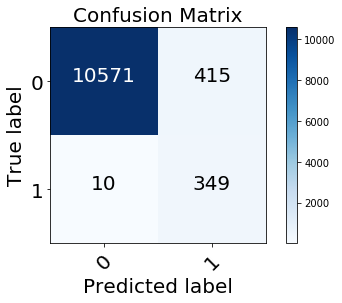

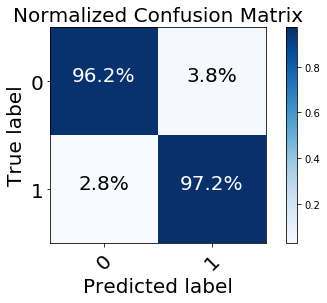

In [33]:
#Plot accuracy results ('stole' this code from sklearn documentation)

clf_current = clf_XGB
clf_current = clf

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion Matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized Confusion Matrix")
    else:
        print('Confusion Matrix')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, size=20)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, size=20)
    plt.yticks(tick_marks, classes, size=20)

    fmt = '.1%' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), size=20,
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label', size=20)
    plt.xlabel('Predicted label', size=20)

class_names = [0, 1]
    
# Compute confusion matrix
cnf_matrix = confusion_matrix(dev_labels, clf_current.predict(dev_data))
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion Matrix')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized Confusion Matrix')

plt.show()

# Initial Insights and Takeaways

Here are our initial insights and commentary from our analysis:

**Data Preparation and Feature Extraction**

* The team spent most of its time on data acquisition and feature extraction, and less on modeling. We think this mimics real-world situations.
* Our initial data set was ~30GB, with our largest table containing 392 million rows (and 9 columns). Because of its large size, we chose to use 1% of the data to build our predictive model. In doing so, we ensured our primary feature to predict, user churn, had approximately the same ratio in our 1% data set as we saw in the full data. In both cases, roughly 6% of users churned, which we noted as an imbalanced data set that we will address in our modeling. Our final data set contained ~50K users.
* Because our churn data was by user (the user column is labeled 'msno'), we extracted several features from both the user_logs table and the transactions table, and in both cases we aggregated them at the user level. Most of our aggregations were sums, means, and counts. We also incorporated 'recency' into our features, that is, we used aggregations relative to a user's last use of the service (e.g., average number of songs played in the past 7, 14, 30, etc. days).
* Though not shown, the team performed several data audits of individual users to ensure the aggregations and other data preparations matched manual calculations of the same data.

**Modeling**

* The team performed a brief exploratory data analysis as seen above, but it is by no means intended to be comprehensive.
* The team split the data into training, dev, and test sets with a ratio of 60/25/15.
* The team tried several models: Gaussian Naive Bayes, K Nearest Neighbors, Random Forest, Support Vector Machine, and XGBoost. Of these, XGBoost and Random Forests performed best. Both had high accuracies (96.4% and 97.1%, respectively), and they had recalls (currently) at 78% and 55%, respectively.
* We're placing an emphasis on recall as our primary metric, moreso than accuracy. Our thinking here is that accuracy has a 'baseline' of 94% (predicting all 0's, i.e., no users churn), making our current best prediction of ~97% much less impressive. Moreover, we're okay with some false positives but would prefer to minimize false negatives. In other words, we'd rather predict a few customers as likely to churn when in fact they would actually stay (false positives) as opposed to predicting customers who would stay but who actually churn (false negatives). This assumption presumes that the long-term cost of keeping customers (for example, the cost of offering discounts) is less than the long-term loss associated with losing customers. Admittedly, more domain knowledge would be required to validate this assumption, but we consider that validation beyond the scope of the project.
* We're not entirely assuming that all reasons for the churn are captured in the data set we have (Usage and Transactions). We're believing that some are and we are biased to find churn particularly dependent on those reasons (features). This helps the business as metrics captured in the data can be influenced more easily than external factors. Examples of these features are cost/day in the plan and the user tenure.

**Next Steps**

We've identified several items before the final submission:

* Feature extraction: We plan to look at additional features we can extract from the data. Ideas include:
    * Changes in recent behavior compared to long-term behavior (e.g., # of songs heard in the past 7 days vs. the past 180 days)
    * Comparing the transaction metrics between the last 2 transactions
    * Differences in transaction activity vs. usage (e.g., customers who might still be paying monthly fees but not listening to music)
    * Scaling / normalizing features
    * Better handling of date features
* Model tweaking: Adjusting model parameters and employing GridSearch to automate this process.
* Provide more documentation of the approach and analysis:
    * Writing more about the hypotheses of our features
    * Including our data discription (largely what we provided a couple weeks ago that lists our primary tables and feature names)
* Improving code where possible for efficiency, readability, commenting, and function descriptions.

We look forward to continuing to work on the project and welcome any feedback!

## Doodling with Probabilities

In [34]:
clf_current = clf

df_prob = pd.concat([pd.DataFrame(clf_current.predict_proba(dev_data)), dev_labels.to_frame()], axis=1)

for i in range(1,20):    
    bin_prob = df_prob[(df_prob[1] > i/20) & (df_prob[1] <= (i+1)/20)]
    prob_num = bin_prob.is_churn.sum()
    prob_den = len(bin_prob)
    print(i/20, 'to', (i+1)/20, prob_num, prob_den, prob_num / prob_den)

#Horrible at probabilties ... highly uncalibrated.
df_prob

0.05 to 0.1 2 672 0.002976190476190476
0.1 to 0.15 1 413 0.002421307506053269
0.15 to 0.2 3 183 0.01639344262295082
0.2 to 0.25 1 119 0.008403361344537815
0.25 to 0.3 0 47 0.0
0.3 to 0.35 0 38 0.0
0.35 to 0.4 0 27 0.0
0.4 to 0.45 1 37 0.02702702702702703
0.45 to 0.5 1 27 0.037037037037037035
0.5 to 0.55 0 30 0.0
0.55 to 0.6 2 25 0.08
0.6 to 0.65 2 38 0.05263157894736842
0.65 to 0.7 1 43 0.023255813953488372
0.7 to 0.75 1 40 0.025
0.75 to 0.8 1 32 0.03125
0.8 to 0.85 7 42 0.16666666666666666
0.85 to 0.9 7 37 0.1891891891891892
0.9 to 0.95 18 68 0.2647058823529412
0.95 to 1.0 310 409 0.7579462102689487


,0,1,is_churn
0,0.893454,0.106546,0
1,0.992589,0.007411,0
2,0.999431,0.000569,0
3,0.999848,0.000152,0
4,0.999526,0.000474,0
5,0.999929,0.000071,0
6,0.987844,0.012156,0
7,0.999837,0.000163,0
8,0.994094,0.005906,0
9,0.973783,0.026217,0


# Appendix

## Code that we tried but ultimately didn't use

The code below shows attempts of other classifiers.  We tuned their parameters more than what's shown here, but ultimately didn't have much luck with any of these classifiers.

In [35]:
### NB Attempt ###
clf_NB_Gauss = GaussianNB()
clf_NB_Gauss.fit(train_data, train_labels)
print('NAIVE BAYES CLASSIFIER')
print('Accuracy: {:.2%}'.format(clf_NB_Gauss.score(dev_data, dev_labels)))
print(classification_report(dev_labels, clf_NB_Gauss.predict(dev_data)))
print(confusion_matrix(dev_labels, clf_NB_Gauss.predict(dev_data)))

### KNN Attempt ###
print('\n\nKNN CLASSIFIER')
clf_neigh = KNeighborsClassifier(n_neighbors=10, n_jobs=8)  #Accuracy plateaus around n=10, all 0's
clf_neigh.fit(train_data, train_labels)
print('Accuracy: {:.2%}'.format(clf_neigh.score(dev_data, dev_labels)))
print(classification_report(dev_labels, clf_neigh.predict(dev_data)))
print(confusion_matrix(dev_labels, clf_neigh.predict(dev_data)))

#### SVM Attempts ###
print('\n\nSVM CLASSIFIER')
clf_SVM = svm.SVC(kernel='rbf', C=1, max_iter=640)  #max_iter=635 gives 6% accuracy ... need new approach / tuning
clf_SVM.fit(train_data, train_labels)
print('\nAccuracy: {:.2%}'.format(clf_SVM.score(dev_data, dev_labels)))
print(classification_report(dev_labels, clf_SVM.predict(dev_data)))
print(confusion_matrix(dev_labels, clf_SVM.predict(dev_data)))

NAIVE BAYES CLASSIFIER
Accuracy: 96.75%
             precision    recall  f1-score   support

          0       0.97      1.00      0.98     10986
          1       0.00      0.00      0.00       359

avg / total       0.94      0.97      0.95     11345

[[10976    10]
 [  359     0]]


KNN CLASSIFIER
Accuracy: 69.22%
             precision    recall  f1-score   support

          0       0.98      0.70      0.81     10986
          1       0.05      0.49      0.09       359

avg / total       0.95      0.69      0.79     11345

[[7676 3310]
 [ 182  177]]


SVM CLASSIFIER


C:\Users\camke\Anaconda3\lib\site-packages\sklearn\svm\base.py:218: ConvergenceWarning: Solver terminated early (max_iter=640).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)



Accuracy: 3.28%
             precision    recall  f1-score   support

          0       1.00      0.00      0.00     10986
          1       0.03      1.00      0.06       359

avg / total       0.97      0.03      0.00     11345

[[   13 10973]
 [    0   359]]
